# Customer Segment Prediction

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing visualization library
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Initial Data Exploration

In [4]:
# Reading Data from given 'CSV' file.
data = pd.read_csv('Customers.csv')

In [5]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## Task 2: Create Scatter Plot between Annual Income & Spending Scoreending Score

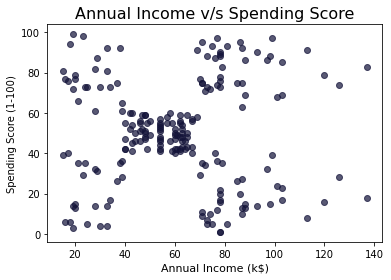

In [8]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color='#131339', alpha=0.7)
plt.title("Annual Income v/s Spending Score", color='#000000', size=16)
plt.xlabel("Annual Income (k$)", size=11)
plt.ylabel("Spending Score (1-100)")
plt.show()

## Task 3: Perform Scaling using MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaler.fit(data[['Annual Income (k$)']])
data['Annual Income (k$)_Scaled'] = scaler.transform(data[['Annual Income (k$)']])

In [11]:
scaler.fit(data[['Spending Score (1-100)']])
data['Spending Score_Scaled'] = scaler.transform(data[['Spending Score (1-100)']])

In [12]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_Scaled,Spending Score_Scaled
0,1,Male,19,15,39,0.000000,0.387755
1,2,Male,21,15,81,0.000000,0.816327
2,3,Female,20,16,6,0.008197,0.051020
3,4,Female,23,16,77,0.008197,0.775510
4,5,Female,31,17,40,0.016393,0.397959


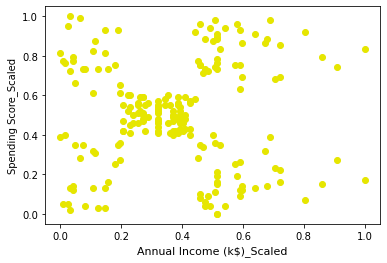

In [13]:
# Plotting the Scatter Plot.

plt.scatter(data['Annual Income (k$)_Scaled'], data['Spending Score_Scaled'], color='#e6e600')
plt.xlabel("Annual Income (k$)_Scaled", size=11)
plt.ylabel("Spending Score_Scaled")
plt.show()

## Task 4: Develop Clusters using KMeans

In [14]:
from sklearn.cluster import KMeans

In [17]:
# Finding the optimum number of clusters for K-Means classification

k_rng = range(1,15)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Annual Income (k$)_Scaled']], data[['Spending Score_Scaled']])
    sse.append(km.inertia_)
    
# Sum of Squared Errors
sse

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[9.223144316044067,
 3.269342172056498,
 1.5800410461523071,
 0.8921064709401019,
 0.5698398408006047,
 0.3393513008535854,
 0.26417549685824365,
 0.1899562231193513,
 0.15246955372257714,
 0.11671333347294102,
 0.09564556815127898,
 0.06851384677909803,
 0.05896389957798178,
 0.05219545340144642]

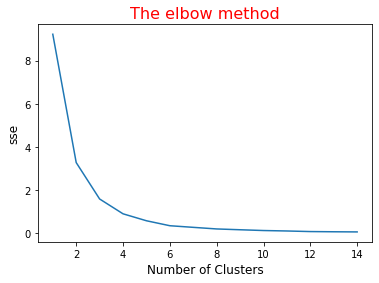

In [26]:
# Plotting the results onto a line graph, 
plt.title('The elbow method', size=16, color='red')
plt.xlabel('Number of Clusters', size=12)
plt.ylabel('sse', size=12)
plt.plot(k_rng, sse)
plt.show()

In [19]:
# Applying K-Means to the Dataset
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data[['Annual Income (k$)_Scaled','Spending Score_Scaled']])
y_predicted

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [20]:
data['cluster'] = y_predicted
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_Scaled,Spending Score_Scaled,cluster
0,1,Male,19,15,39,0.000000,0.387755,3
1,2,Male,21,15,81,0.000000,0.816327,1
2,3,Female,20,16,6,0.008197,0.051020,3
3,4,Female,23,16,77,0.008197,0.775510,1
4,5,Female,31,17,40,0.016393,0.397959,3


In [21]:
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]
df4 = data[data.cluster == 3]

Text(0, 0.5, 'Spending Score_Scaled')

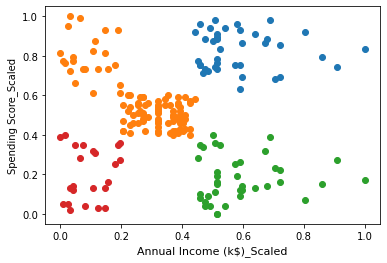

In [22]:
# Visualising the Clusters
plt.scatter(df1['Annual Income (k$)_Scaled'],df1['Spending Score_Scaled'])
plt.scatter(df2['Annual Income (k$)_Scaled'],df2['Spending Score_Scaled'])
plt.scatter(df3['Annual Income (k$)_Scaled'],df3['Spending Score_Scaled'])
plt.scatter(df4['Annual Income (k$)_Scaled'],df4['Spending Score_Scaled'])

plt.xlabel("Annual Income (k$)_Scaled", size=11)
plt.ylabel("Spending Score_Scaled")

In [23]:
# Determining Cluster-Centers
km.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.27262295, 0.56612245],
       [0.59016393, 0.17991407],
       [0.09265859, 0.20319432]])

Text(0, 0.5, 'Spending Score_Scaled')

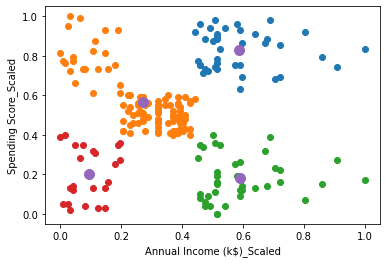

In [25]:
# Visualising the Clusters with Cluster-Centers
plt.scatter(df1['Annual Income (k$)_Scaled'],df1['Spending Score_Scaled'])
plt.scatter(df2['Annual Income (k$)_Scaled'],df2['Spending Score_Scaled'])
plt.scatter(df3['Annual Income (k$)_Scaled'],df3['Spending Score_Scaled'])
plt.scatter(df4['Annual Income (k$)_Scaled'],df4['Spending Score_Scaled'])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='o', s=100)

plt.xlabel("Annual Income (k$)_Scaled")
plt.ylabel("Spending Score_Scaled")